Automatically analysis all data-files in a dataset
=======

Import the required bits.

In [16]:
import numpy as np
from mindaffectBCI.decoder.offline.datasets import get_dataset
import matplotlib.pyplot as plt
from analyse_datasets import analyse_dataset, analyse_datasets, datasets_GridSearchCV, concurrent_datasets_GridSearchCV, debug_test_dataset, debug_test_single_dataset
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = [12, 8] # bigger default figures

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Analyse all datafiles in a single dataset with fixed parameters
-----
Specify the dataset to analysis and the parameters to run with:
  * `dataset`:string - dataset to load, using datasets.get_dataset.  See datasets.py for full list datasets
  * `loader_args`:dict - fs_out:float - output-sample-rate of 100Hz
  * `stopband`:list - list of stop-bands/pass-bands applied during loading before slicing.  
          (45,65) = block line-noise (50/60hz), (3,25,'bandpass') = pass between 3 and 25hz
  * `preprocess_args`:dict - set of parameters to pass to the preprocessor (if any)
  * `model`:string - type of model to fit, including: 'cca','fwd','bwd','ridge','lr','svr','svc','sklearn' see model_fitting for full list. Note: different models may require different parameters in clsfr_args
  * `clsfr_args`:dict - tau_ms:float - stimulus response length in milliseconds
  * `evtlabs`:list - list of brain-events to use (see stim2event.py for full possibilities)  're'=rising-edge, 'fe'=falling-edge
  * `rank`:int - rank of the decomposition to fit 

`analyse_datasets` will then run all the matching datafiles from this dataset type generating a textual _decoding curve_ summary for each file.  At the end of the run it will then generate a summary graphical decoding curve for all the run datafiles.

0) D:/own_experiments/noisetagging_v3\s1\traindata.mat
resample by 2.0: 180->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(36, 756, 64), Y=(36, 756, 37) @90.0hz
Cscale=0.018590427190197753
Rank score: 1=0.539, 2=0.709, 3=0.715, 5=0.706 -> best=3
Sigma0 = 0.012722199642173719
softmaxscale=7
model wght= [0.46325998 0.20891019 0.32782983]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe', 'ntre'),
         offset=0, rank=3, rcond=(0.0001, 1e-08), reg=(1e-08, None),
         symetric=False, tau=40)
score=0.6891901822457378
Int Lens:..............................

            IntLen   100   201   277   378   478   554   655   756 
              Perr  0.81  0.36  0.19  0.14  0.11  0.08  0.06  0.03   AUDC 25.6
         Perr(est)  0.65  0.30  0.17  0.09  0.06  0.06  0.03  0.01   PSAE 22.9
           StopErr  0.72  0.28  0.19  0.08  0.08  0.08  0.08  0.08   AUSC 24.2
     StopThresh(P)  0.43  0.12  0.07  0.03  0.03  0.03  0.03  0.03   SSAE 52.7

1) D:/own_experime

Int Lens:..............................

            IntLen   100   201   277   378   478   554   655   756 
              Perr  0.72  0.67  0.58  0.36  0.22  0.17  0.06  0.14   AUDC 42.5
         Perr(est)  0.80  0.61  0.40  0.31  0.25  0.20  0.13  0.11   PSAE 18.9
           StopErr  0.78  0.61  0.44  0.22  0.22  0.19  0.19  0.19   AUSC 39.5
     StopThresh(P)  0.66  0.44  0.37  0.17  0.13  0.11  0.11  0.11   SSAE 31.7

9) D:/own_experiments/noisetagging_v3\s7\traindata.mat
resample by 2.0: 180->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(36, 756, 64), Y=(36, 756, 37) @90.0hz
Cscale=0.018158404781892835
Rank score: 1=0.483, 2=0.578, 3=0.572, 5=0.511 -> best=2
Sigma0 = 0.009063337793447562
softmaxscale=5
model wght= [0.39615488 0.18692844 0.41691667]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe', 'ntre'),
         offset=0, rank=2, rcond=(0.0001, 1e-08), reg=(1e-08, None),
         symetric=False, tau=40)
score=0.5621693121693122
Int Lens:.........

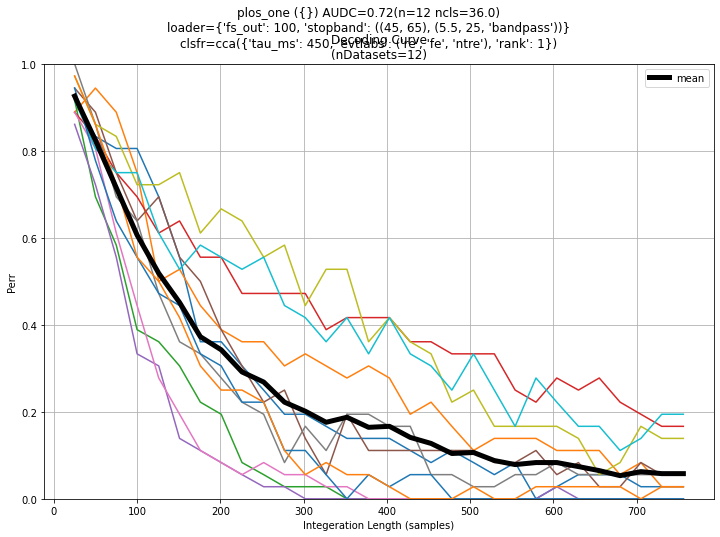

In [2]:
# run all 'plos_one' datasets with cross-validation to estimate system performance, with:

analyse_datasets('plos_one',loader_args=dict(fs_out=100,stopband=((45,65),(5.5,25,'bandpass'))),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False, whiten_spectrum=.1),
                 model='cca',cv=[(slice(10),slice(10,None))],clsfr_args=dict(tau_ms=450,evtlabs=('re','fe','ntre'),rank=1),ranks=(1,2,3,5),prediction_offsets=(-1,0,1))
#  when it's done it will make a summary plot ofthe decoding curves over all the datasets


# bp=5.5-25 cv=10fold tau=450 evtlabs=('re','fe','ntre') rank=(1,2,3,5) ofs=80 spect_wht=.1, pred_offsets=(-1,0,1) -> .72 (@.06 : 24,16,23,9)  # slight reduction in performance.
# bp=5.5-25 cv=10fold tau=450 evtlabs=('re','fe','ntre') rank=(1,2,3,5) ofs=80 spect_wht=.1 -> .76 (@.05 : 21,14,19,14)

# bp=5.5-25 tau=450, rank=(1,2,3,5), ofs=80, spect_wht=.1 -> .76 (@.05 : 21,14,19,14)  (3hz helps s12)
# bp=3-25 tau=450, rank=(1,2,3,5), ofs=80, spect_wht=.1 -> .77 (@.04 : 21,14,19,14) 

# bp=3-25, tau=450, rank=(1,2,3,5), ofs=80 -> .75 (@.07 : 16,22,13,32) 
# bp=3-25, tau=500, rank=3, reg=.02, ofs=80 -> .75 (@.09)
# bp=3-25, tau=450, rank=1, reg=.02, ofs=80 -> .71 (@.12 : 28,20,26,8)
# bp=3-25, tau=450, rank=1, reg=.02, ofs=80, spect_whiten=.01 -> .71 (@.09 : 28,19,25,16)
# bp=3-25, tau=450, rank=1, reg=.02, ofs=80, spect_whiten=.05 -> .70 (@.09 : 28,15,25,13)
# bp=3-25, tau=450, rank=1, reg=.02, ofs=80, spect_whiten=.01 -> .66 (@.12 : 32,13,29,11)
# bp=3-25, tau=450, rank=1, reg=.02, ofs=80, evtlabs=('re','fe','anyfe') -> .67 (@.14)

Run different parameter settings and compare final performance
-----
To automatically run multiple different parameter settings use the `datasets_GridSearchCV` function.  This function operates similarly to `sklear.model_selection.GridSearchCV` to generate a grid of parameters and exaustively try each one with a cross-validated test.  The main difference to using GridSearchCV directly, is that this method will also run over all datafiles in the dataset and accumulate the results to a final summary result at the end.

To use:
 * Specify the default parameters as for `analyse_datasets`
 * Specify the parameter grid to test by specifying a dictionary of lists of parameter settings in `tuned_parameters`.  Note: in this dictionary you can use `clsfr_args_XXXX` to specify an *overriding* parameter setting for the `XXXX` field of the `clsfr_args` parameter dictionary.  Similarly for the `preprocess_args` and `loader_args` parameter dictionaries. 

Specify the general default analysis parameters

In [7]:
dataset = 'mindaffectBCI' 
dataset_args= dict(exptdir='~/Desktop/mark',regexp='noisetag') # sub-set of this directories files to run
loader_args = dict(fs_out=100,stopband=(45,-1)) # low-pass and downsample at load time
preprocess_args = dict(stopband=(4,25,'bandpass')) # band-pass at preprocess time
test_idx = slice(10,None) # fit on 1st 10 trials, test (+eval) on the rest
clsfr_args = dict(tau_ms=300,offset_ms=125,evtlabs=('re','fe'),ranks=(1,2,3,5,10),
                 startup_correction=50, priorweight=0, nvirt_out=0, nocontrol_condn=.1) # default model fitting settings
label = 'nb' # unique name for this run

specify the `tuned_parameters` grid to evaluate.

**N.B. each field should contain a list of valid parameter settings**

In [22]:
tuned_parameters=dict()
#tuned_parameters['clsfr_args_nocontrol_condn']=[.5]        
#tuned_parameters['clsfr_args_nvirt_out']=[0]
#tuned_parameters['clsfr_args_startup_correction']=[50]
#tuned_parameters['clsfr_args_priorweight']=[0]
#tuned_parameters['preprocess_args_whiten']=[.95, .99, True]
#tuned_parameters['preprocess_args_whiten_spectrum']=[.95, .99, True]
tuned_parameters['preprocess_args_adaptive_whiten']=[1e-8, .1, .5, .9, 1]
#tuned_parameters['outputscore']=['ip']
#tuned_parameters['symetric']=[False]
tuned_parameters['CCA']=[(False,True)]
#tuned_parameters['center']=[True]
#tuned_parameters['priorweight']=[0,10,50,100] 
#tuned_parameters['reg']=[(None,None),(1e-8,0),(1e-6,0),(1e-4,0),(1e-2,0),(1e-8,1e-8),(1e-8,1e-6),(1e-8,1e-4),(1e-6,1e-6),(1e-4,1e-6),(1e-2,1e-4)]
#tuned_parameters['rcond']=[(1e-8,0),(1e-8,1e-6),(1e-6,0),(1e-6,1e-8),(1e-6,1e-6),(1e-6,1e-4),(1e-4,0),(1e-4,1e-8),(1e-4,1e-6),(1e-4,1e-4),(1e-2,0),(1e-2,1e-8),(1e-2,1e-6),(1e-2,1e-4)]
#tuned_parameters['clsfr_args_evtlabs']=[('re','fe'),('re','fe','anyfe')]
#tuned_parameters['clsfr_args_tau_ms']=[300,450]
#tuned_parameters['clsfr_args_offset_ms']=[50,125,175]

Now run the cross dataset analysis.    **This may take some time**   To speed things up a bit we use the concurrent version which will run up to num_cpu_threads datafiles in parallel.

At the end you will get a textual summary of the results, and the detailed results are returned.

In [23]:
res=concurrent_datasets_GridSearchCV("mindaffectBCI",
                     dataset_args=dataset_args,
                     loader_args=loader_args,
                     preprocess_args=preprocess_args,
                     model='cca',test_idx = test_idx,
                     clsfr_args=clsfr_args,
                     tuned_parameters=tuned_parameters, label=label)

Running with None parallel tasks
0) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201029_1340_ganglion.txt
1) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201029_1350_ganglion.txt
2) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201029_1356_ganglion.txt
3) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201029_1403_ganglion.txt
4) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201029_1418_ganglion.txt
5) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201029_1425_ganglion.txt
6) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201029_1434_ganglion.txt
7) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201029_1443_ganglion.txt
8) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201102_1313_ganglion.txt
9) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201102_1319_ganglion.txt
10) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201102_1326_ganglion.txt
11) C:\Us

In [ ]:
# try with different modeling parameters, 
#   e.g. 2-bit brain responses, '00'=low,'11'=high,'01'=rising-edge,'10'=falling-edge
analyse_datasets('plos_one',loader_args=dict(fs_out=100,stopband=((45,65),(5.5,25,'bandpass'))),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False, whiten_spectrum=.1),
                 model='cca',clsfr_args=dict(tau_ms=450,evtlabs=('00','01','10','11'),rank=5),ranks=(1,2,3,5))
# bp=3-35, rank=(1,2,3,5) -> .0 @98...

In [ ]:
# WOW! that killed!! performance, Suspect that too many evt types introduced numerical issues...
# tweak the condition number in the CCA matrix inverses with the rcond parameter to address the numerical degenercies...
# alternative is to use reg
analyse_datasets('plos_one',loader_args=dict(fs_out=60,stopband=(3,30,'bandpass')),
                 model='cca',clsfr_args=dict(tau_ms=350,evtlabs=('00','01','10','11'),rank=1,rcond=(1e-6,1e-4)))
# Not as good as re-fe alone, but OK.

In [ ]:
dataset_loader, dataset_files, dataroot = get_dataset('lowlands')
print("Got {} datasets".format(len(dataset_files)))


0) D:/own_experiments/lowlands\LL_eng_02_20170818_tr_train_1.mat
resample by 3.5: 360->102.85714285714286Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 412, 38), Y=(20, 412, 37) @102.85714285714286hz
Cscale=0.01740400046551257
Rank score: 1=0.427, 2=0.291, 3=0.287, 5=0.185 -> best=1
Sigma0 = 0.010338795824053094
softmaxscale=5
model wght= [0.44357921 0.15799888 0.39842191]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe', 'ntre'),
         offset=0, rank=1, rcond=(0.0001, 1e-08), reg=(1e-08, None),
         symetric=False, tau=46)
score=0.39975728155339807
Int Lens:..............................

            IntLen    54   109   151   206   260   302   357   412 
              Perr  0.80  0.75  0.55  0.60  0.55  0.60  0.45  0.50   AUDC 61.7
         Perr(est)  0.74  0.71  0.71  0.53  0.42  0.39  0.33  0.33   PSAE 19.9
           StopErr  0.85  0.65  0.60  0.55  0.55  0.60  0.50  0.50   AUSC 61.8
     StopThresh(P)  0.73  0.55  0.43  0.36  0.31  0.27  0.31

resample by 3.5: 360->102.85714285714286Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 412, 38), Y=(20, 412, 37) @102.85714285714286hz
Cscale=0.015497595982358824
Rank score: 1=0.804, 2=0.771, 3=0.743, 5=0.690 -> best=1
Sigma0 = 0.012997394575531994
softmaxscale=10
model wght= [0.3910228  0.18506908 0.42390812]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe', 'ntre'),
         offset=0, rank=1, rcond=(0.0001, 1e-08), reg=(1e-08, None),
         symetric=False, tau=46)
score=0.7781553398058253
Int Lens:..............................

            IntLen    54   109   151   206   260   302   357   412 
              Perr  0.60  0.20  0.20  0.05  0.00  0.00  0.00  0.00   AUDC 19.8
         Perr(est)  0.47  0.29  0.16  0.03  0.01  0.02  0.00  0.00   PSAE 17.0
           StopErr  0.60  0.20  0.15  0.05  0.05  0.05  0.05  0.05   AUSC 19.0
     StopThresh(P)  0.33  0.11  0.06  0.02  0.02  0.02  0.02  0.02   SSAE 35.3

9) D:/own_experiments/lowlands\LL_eng_11_201

Rank score: 1=0.722, 2=0.757, 3=0.730, 5=0.701 -> best=2
Sigma0 = 0.0297140426815245
softmaxscale=10
model wght= [0.39019864 0.16344238 0.44635898]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe', 'ntre'),
         offset=0, rank=2, rcond=(0.0001, 1e-08), reg=(1e-08, None),
         symetric=False, tau=46)
score=0.7501213592233009
Int Lens:..............................

            IntLen    54   109   151   206   260   302   357   412 
              Perr  0.80  0.30  0.15  0.20  0.10  0.05  0.10  0.10   AUDC 24.7
         Perr(est)  0.53  0.35  0.21  0.10  0.07  0.05  0.07  0.05   PSAE 31.1
           StopErr  0.70  0.40  0.10  0.05  0.05  0.05  0.05  0.05   AUSC 23.5
     StopThresh(P)  0.33  0.16  0.08  0.05  0.05  0.05  0.05  0.05   SSAE 19.0

17) D:/own_experiments/lowlands\LL_eng_19_20170819_tr_train_1.mat
resample by 3.5: 360->102.85714285714286Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 412, 38), Y=(20, 412, 37) @102.85714285714286hz
Cscale=0

Sigma0 = 0.010268499089741454
softmaxscale=3
model wght= [0.43234818 0.22467021 0.34298162]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe', 'ntre'),
         offset=0, rank=1, rcond=(0.0001, 1e-08), reg=(1e-08, None),
         symetric=False, tau=46)
score=0.16213592233009708
Int Lens:..............................

            IntLen    54   109   151   206   260   302   357   412 
              Perr  0.95  0.90  0.90  0.75  0.75  0.75  0.65  0.55   AUDC 80.2
         Perr(est)  0.88  0.89  0.88  0.83  0.78  0.69  0.68  0.65   PSAE  7.4
           StopErr  0.90  0.65  0.65  0.75  0.70  0.65  0.65  0.55   AUSC 71.8
     StopThresh(P)  0.86  0.81  0.81  0.78  0.73  0.70  0.67  0.65   SSAE  7.5

25) D:/own_experiments/lowlands\ll_eng_27_20170819_tr_train_1.mat
resample by 3.5: 360->102.85714285714286Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 412, 38), Y=(20, 412, 37) @102.85714285714286hz
Cscale=0.0141060930266288
Rank score: 1=0.451, 2=0.357, 3=0.325

Int Lens:..............................

            IntLen    54   109   151   206   260   302   357   412 
              Perr  0.95  1.00  0.95  0.80  0.55  0.60  0.60  0.70   AUDC 79.2
         Perr(est)  0.81  0.83  0.83  0.77  0.63  0.59  0.46  0.47   PSAE 14.4
           StopErr  1.00  0.95  0.90  0.75  0.65  0.75  0.70  0.70   AUSC 81.7
     StopThresh(P)  0.76  0.73  0.65  0.58  0.54  0.49  0.46  0.47   SSAE 25.8

33) D:/own_experiments/lowlands\ll_eng_35_20170820_tr_train_1.mat
resample by 3.5: 360->102.85714285714286Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 412, 38), Y=(20, 412, 37) @102.85714285714286hz
Cscale=0.01682734604726525
Rank score: 1=0.783, 2=0.743, 3=0.726, 5=0.716 -> best=1
Sigma0 = 0.019720116279142434
softmaxscale=7
model wght= [0.38237677 0.16797223 0.44965099]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe', 'ntre'),
         offset=0, rank=1, rcond=(0.0001, 1e-08), reg=(1e-08, None),
         symetric=False, tau=46)
score

Int Lens:..............................

            IntLen    54   109   151   206   260   302   357   412 
              Perr  1.00  1.00  0.95  0.90  0.90  0.95  0.95  0.95   AUDC 95.8
         Perr(est)  0.96  0.97  0.97  0.96  0.96  0.96  0.96  0.96   PSAE  2.5
           StopErr  0.95  0.95  0.95  0.95  0.95  0.95  0.95  0.95   AUSC 95.0
     StopThresh(P)  0.96  0.96  0.96  0.96  0.96  0.96  0.96  0.96   SSAE  0.8

49) D:/own_experiments/lowlands\ll_nl_05_20170818_tr_train_1.mat
resample by 3.5: 360->102.85714285714286Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 412, 34), Y=(20, 412, 37) @102.85714285714286hz
Cscale=0.03186617393261551
Rank score: 1=0.338, 2=0.344, 3=0.268, 5=0.279 -> best=2
Sigma0 = 0.03766620219192146
softmaxscale=15
model wght= [0.43005388 0.21069019 0.35925593]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe', 'ntre'),
         offset=0, rank=2, rcond=(0.0001, 1e-08), reg=(1e-08, None),
         symetric=False, tau=46)
score=

Int Lens:..............................

            IntLen    54   109   151   206   260   302   357   412 
              Perr  0.75  0.45  0.35  0.30  0.25  0.15  0.15  0.15   AUDC 35.2
         Perr(est)  0.55  0.47  0.43  0.22  0.12  0.05  0.02  0.02   PSAE 45.3
           StopErr  0.90  0.55  0.20  0.15  0.15  0.15  0.15  0.15   AUSC 34.7
     StopThresh(P)  0.54  0.34  0.14  0.07  0.02  0.02  0.02  0.02   SSAE 57.9

65) D:/own_experiments/lowlands\ll_nl_22_20170819_tr_train_1.mat
resample by 3.5: 360->102.85714285714286Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 412, 34), Y=(20, 412, 37) @102.85714285714286hz
Cscale=0.010830627320164031
Rank score: 1=0.761, 2=0.776, 3=0.793, 5=0.762 -> best=3
Sigma0 = 0.03385306723714334
softmaxscale=10
model wght= [0.42907401 0.14026697 0.43065902]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe', 'ntre'),
         offset=0, rank=3, rcond=(0.0001, 1e-08), reg=(1e-08, None),
         symetric=False, tau=46)
score

Int Lens:..............................

            IntLen    54   109   151   206   260   302   357   412 
              Perr  0.50  0.35  0.15  0.00  0.00  0.00  0.00  0.00   AUDC 18.2
         Perr(est)  0.40  0.31  0.23  0.02  0.00  0.00  0.00  0.00   PSAE 20.9
           StopErr  0.65  0.20  0.00  0.00  0.00  0.00  0.00  0.00   AUSC 14.3
     StopThresh(P)  0.33  0.11  0.02  0.02  0.02  0.02  0.02  0.02   SSAE 25.6

81) D:/own_experiments/lowlands\LL_NL_41_20170820_tr_train_1.mat
resample by 3.5: 360->102.85714285714286Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 412, 34), Y=(20, 412, 37) @102.85714285714286hz
Cscale=0.018699255680981783
Rank score: 1=0.828, 2=0.711, 3=0.716, 5=0.674 -> best=1
Sigma0 = 0.013029534466793505
softmaxscale=10
model wght= [0.37615633 0.21790007 0.4059436 ]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe', 'ntre'),
         offset=0, rank=1, rcond=(0.0001, 1e-08), reg=(1e-08, None),
         symetric=False, tau=46)
scor

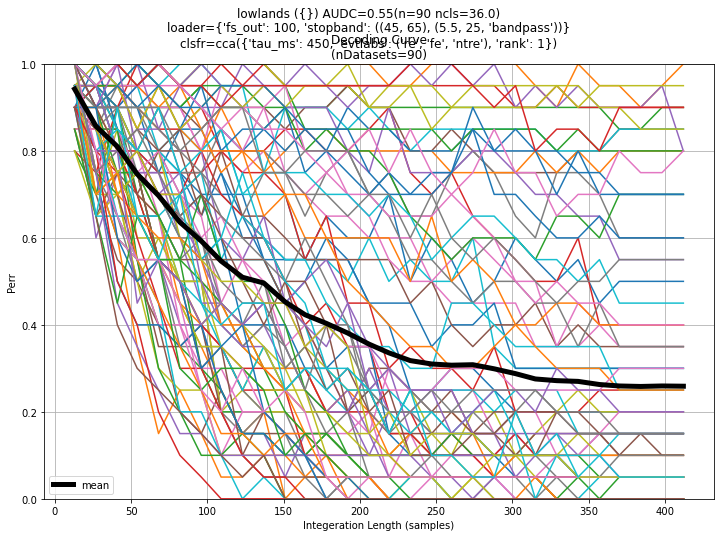

In [10]:
# run the  analysis  -- this may take a while!
analyse_datasets('lowlands',loader_args=dict(fs_out=100,stopband=((45,65),(5.5,25,'bandpass'))),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False, whiten_spectrum=.1),
                 model='cca',clsfr_args=dict(tau_ms=450,evtlabs=('re','fe','ntre'),rank=1),ranks=(1,2,3,5), prediction_offsets=(-1,0,1)) #cv=[(slice(10),slice(10,None))],retrain_on_all=False,


# bp=3-25, rank=1, reg=.02, ofs=60, tau=500 -> .56
# bp=3-25, rank=1, reg=.02, ofs=60, tau=450 -> .56 (@29)
# bp=3-25, rank=1, reg=.02, ofs=80, tau=450 -> .53 (@30)
# bp=3-25, rank=1, reg=.02, ofs=90, tau=450 -> .56 (@28 : 44,23,42,39)
# bp=3-25, rank=(1,2,3,5), ofs=90, tau=450 -> .56 (@29 : 44,23,42,39)

# bp=3-25 cv=10 rank=(1,2,3,5) evtlabs=re,fe,ntre fs_out=100 tau=450 wht_spect=.1 pred_offsets=0 -> .54 (@30 : 45,23,42,39)
# bp=3-25 cv=10 rank=(1,2,3,5) evtlabs=re,fe,ntre fs_out=100 tau=450 wht_spect=.1 pred_offsets=-1,0,1 -> .55 (@26 : 44,23,42,39)




0) D:/own_experiments/lowlands\LL_eng_02_20170818_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 38), Y=(20, 360, 37) @90.0hz
Cscale=0.01637126614742966
Sigma0() = 0.009953293616375675
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=None, reg=0.02, symetric=False, tau=40)
score=0.38222222222222224
Int Lens:..............................

            IntLen    48    96   132   180   228   264   312   360 
              Perr  0.95  0.65  0.65  0.45  0.55  0.55  0.60  0.50   AUDC 62.5
         Perr(est)  0.86  0.55  0.50  0.45  0.44  0.41  0.40  0.42   PSAE 17.2
           StopErr  0.90  0.65  0.60  0.60  0.60  0.55  0.50  0.50   AUSC 63.8
     StopThresh(P)  0.76  0.56  0.40  0.35  0.35  0.33  0.38  0.38   SSAE 28.3

1) D:/own_experiments/lowlands\LL_eng_03_20170818_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 38), Y

10) D:/own_experiments/lowlands\LL_eng_12_20170818_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 38), Y=(20, 360, 37) @90.0hz
Cscale=0.014225796418252924
Sigma0() = 0.013008733586661358
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=None, reg=0.02, symetric=False, tau=40)
score=0.635
Int Lens:..............................

            IntLen    48    96   132   180   228   264   312   360 
              Perr  0.70  0.50  0.40  0.35  0.25  0.20  0.15  0.15   AUDC 36.5
         Perr(est)  0.82  0.55  0.47  0.36  0.29  0.25  0.22  0.19   PSAE 20.6
           StopErr  0.65  0.55  0.40  0.15  0.10  0.15  0.15  0.15   AUSC 31.7
     StopThresh(P)  0.73  0.54  0.46  0.30  0.23  0.19  0.19  0.19   SSAE 44.9

11) D:/own_experiments/lowlands\LL_eng_13_20170818_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 38), Y=(20, 360, 

20) D:/own_experiments/lowlands\ll_eng_22_20170819_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 38), Y=(20, 360, 37) @90.0hz
Cscale=0.014676452513180163
Sigma0() = 0.013736796909964108
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=None, reg=0.02, symetric=False, tau=40)
score=0.49277777777777776
Int Lens:..............................

            IntLen    48    96   132   180   228   264   312   360 
              Perr  0.85  0.70  0.60  0.50  0.40  0.35  0.25  0.25   AUDC 51.5
         Perr(est)  0.85  0.59  0.49  0.46  0.40  0.42  0.30  0.29   PSAE 10.9
           StopErr  0.90  0.55  0.50  0.40  0.25  0.25  0.25  0.25   AUSC 45.0
     StopThresh(P)  0.79  0.51  0.45  0.35  0.32  0.28  0.29  0.29   SSAE 12.9

21) D:/own_experiments/lowlands\ll_eng_23_20170819_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 38)

30) D:/own_experiments/lowlands\LL_eng_32_20170819_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 38), Y=(20, 360, 37) @90.0hz
Cscale=0.015255934600154068
Sigma0() = 0.010537878015197084
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=None, reg=0.02, symetric=False, tau=40)
score=0.6423611111111112
Int Lens:..............................

            IntLen    48    96   132   180   228   264   312   360 
              Perr  0.70  0.75  0.50  0.20  0.20  0.10  0.10  0.05   AUDC 36.2
         Perr(est)  0.85  0.57  0.44  0.26  0.14  0.13  0.08  0.08   PSAE 17.7
           StopErr  0.75  0.55  0.40  0.20  0.10  0.05  0.05  0.05   AUSC 29.5
     StopThresh(P)  0.77  0.52  0.36  0.18  0.11  0.10  0.10  0.10   SSAE 23.3

31) D:/own_experiments/lowlands\LL_eng_33_20170819_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 38),


40) D:/own_experiments/lowlands\ll_eng_43_20170820_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 38), Y=(20, 360, 37) @90.0hz
Cscale=0.018240907839292487
Sigma0() = 0.008028741604129551
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=None, reg=0.02, symetric=False, tau=40)
score=0.2673611111111111
Int Lens:..............................

            IntLen    48    96   132   180   228   264   312   360 
              Perr  0.85  0.85  0.60  0.75  0.80  0.65  0.65  0.60   AUDC 72.8
         Perr(est)  0.86  0.61  0.53  0.51  0.53  0.52  0.45  0.51   PSAE 20.8
           StopErr  0.85  0.70  0.75  0.75  0.65  0.70  0.70  0.60   AUSC 71.5
     StopThresh(P)  0.72  0.50  0.37  0.37  0.38  0.42  0.44  0.48   SSAE 33.0

41) D:/own_experiments/lowlands\ll_eng_44_20170820_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 38)

50) D:/own_experiments/lowlands\ll_nl_06_20170818_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 34), Y=(20, 360, 37) @90.0hz
Cscale=0.03775674482414821
Sigma0() = 0.0022401423513303655
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=None, reg=0.02, symetric=False, tau=40)
score=0.13791666666666666
Int Lens:..............................

            IntLen    48    96   132   180   228   264   312   360 
              Perr  0.90  0.90  0.90  0.90  0.85  0.85  0.85  0.80   AUDC 86.8
         Perr(est)  0.83  0.53  0.54  0.50  0.50  0.51  0.51  0.48   PSAE 35.0
           StopErr  0.90  0.85  0.80  0.80  0.80  0.80  0.80  0.80   AUSC 82.2
     StopThresh(P)  0.76  0.50  0.48  0.41  0.36  0.36  0.43  0.47   SSAE 39.2

51) D:/own_experiments/lowlands\ll_nl_07_20170818_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 34), 

60) D:/own_experiments/lowlands\LL_NL_17_20170818_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 34), Y=(20, 360, 37) @90.0hz
Cscale=0.027026617363017653
Sigma0() = 0.009517438189416482
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=None, reg=0.02, symetric=False, tau=40)
score=0.31472222222222224
Int Lens:..............................

            IntLen    48    96   132   180   228   264   312   360 
              Perr  0.90  0.85  0.80  0.70  0.65  0.55  0.40  0.35   AUDC 68.0
         Perr(est)  0.87  0.64  0.62  0.49  0.49  0.42  0.43  0.42   PSAE 19.8
           StopErr  0.95  0.90  0.70  0.65  0.45  0.40  0.40  0.35   AUSC 62.5
     StopThresh(P)  0.79  0.62  0.50  0.40  0.36  0.37  0.38  0.42   SSAE 21.4

61) D:/own_experiments/lowlands\LL_NL_18_20170818_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 34), 

resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 34), Y=(20, 360, 37) @90.0hz
Cscale=0.0219216208862282
Sigma0() = 0.01645867580536951
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=None, reg=0.02, symetric=False, tau=40)
score=0.8075
Int Lens:..............................

            IntLen    48    96   132   180   228   264   312   360 
              Perr  0.35  0.15  0.10  0.10  0.10  0.10  0.05  0.10   AUDC 19.2
         Perr(est)  0.85  0.35  0.19  0.11  0.07  0.07  0.07  0.07   PSAE 45.7
           StopErr  0.55  0.10  0.10  0.10  0.10  0.10  0.10  0.10   AUSC 20.7
     StopThresh(P)  0.77  0.39  0.20  0.10  0.10  0.10  0.10  0.10   SSAE 50.5

71) D:/own_experiments/lowlands\LL_NL_29_20170819_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 34), Y=(20, 360, 37) @90.0hz
Cscale=0.017632999861521278
Sigma0() = 0.0120238617026239

80) D:/own_experiments/lowlands\ll_nl_40_20170820_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 34), Y=(20, 360, 37) @90.0hz
Cscale=0.011776044688665764
Sigma0() = 0.012943156922257639
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=None, reg=0.02, symetric=False, tau=40)
score=0.8408333333333333
Int Lens:..............................

            IntLen    48    96   132   180   228   264   312   360 
              Perr  0.60  0.15  0.10  0.00  0.00  0.00  0.00  0.00   AUDC 15.2
         Perr(est)  0.85  0.40  0.22  0.08  0.02  0.02  0.01  0.01   PSAE 58.3
           StopErr  0.60  0.00  0.00  0.00  0.00  0.00  0.00  0.00   AUSC 12.8
     StopThresh(P)  0.76  0.37  0.13  0.03  0.03  0.03  0.03  0.03   SSAE 70.2

81) D:/own_experiments/lowlands\LL_NL_41_20170820_tr_train_1.mat
resample by 4.0: 360->90.0Hz
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(20, 360, 34), Y


--------

 Ave-score=0.5724197530864198

Ave-DC
            IntLen    48    96   132   180   228   264   312   360 
              Perr  0.71  0.51  0.43  0.35  0.32  0.29  0.27  0.27   AUDC 42.8
         Perr(est)  0.84  0.49  0.39  0.31  0.26  0.24  0.22  0.22   PSAE 13.3
           StopErr  0.70  0.47  0.38  0.31  0.28  0.27  0.27  0.27   AUSC 40.4
     StopThresh(P)  0.76  0.47  0.33  0.23  0.20  0.20  0.21  0.22   SSAE 16.8




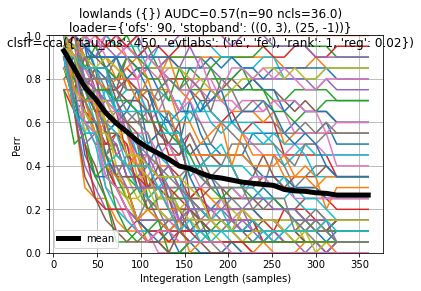

In [7]:
# run the  analysis  -- this may take a while!
analyse_datasets('lowlands',loader_args=dict(fs_out=90,stopband=((0,3),(25,-1))),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False, whiten_spectrum=.1),
                 model='cca',clsfr_args=dict(tau_ms=450,evtlabs=('re','fe'),rank=1,reg=.02))
# bp=3-25, rank=1, reg=.02, ofs=90, tau=450 -> .56 (@.28 : 44,12,42,17)
# bp=3-25, rank=1, reg=.02, ofs=90, tau=450, spectral_whiten=.1 -> .57 (@.27 : 42,13,40,17)

In [ ]:
dataset_loader, dataset_files, dataroot = get_dataset('p300_prn')
print("Got {} datasets".format(len(dataset_files)))

In [ ]:
analyse_datasets('p300_prn',dataset_args=dict(label='rc_5_flash'),
                 loader_args=dict(fs_out=32,stopband=((0,1),(12,-1)),subtriallen=None),
                 model='cca',clsfr_args=dict(tau_ms=750,evtlabs=('re','anyre'),rank=3,reg=.02))
# bp=1-12, ofs=32, tau=750, evtlabs=('re','anyre'), rank=1 -> 33 (@10)
# bp=1-12, ofs=32, tau=750, evtlabs=('re','anyre'), rank=1 -> 28 (@08)
# bp=1-12, ofs=32, tau=750, evtlabs=('re','anyre'), rank=1 -> 29 (@09)


In [ ]:
debug_test_single_dataset('p300_prn',dataset_args=dict(label='rc_5_flash'),
                 loader_args=dict(fs_out=32,stopband=((0,1),(12,-1)),subtriallen=None),
                 model='cca',tau_ms=750,evtlabs=('re','anyre'),rank=3,reg=.02)

In [ ]:
analyse_datasets('p300_prn',dataset_args=dict(label='nan_rc_5_flip'),
                 loader_args=dict(fs_out=32,stopband=((0,1),(8,-1)),subtriallen=None),
                 clsfr_args=dict(tau_ms=750,evtlabs=('re','anyre'),rank=6,reg=.02))
# bp=1-8, tau=750, rank=3, reg=.02 -> 73 (@.07)  
# bp=1-12, tau=750, rank=3, reg=.02 -> 72 (@.07)  
# bp=3-25, tau=750, rank=3, reg=.02 -> 66 (@.16)
# bp=1-25, tau=750, rank=3, reg=.02 -> 69 (@.08)
# bp=1-8, tau=750, rank=1, reg=.02 -> 68 (@.12)  

0) D:/own_experiments/visual/p300_prn_2\alex\20100722\jf_prep\alex_prn_5_flip.mat
stimRng=(-253.0, 6701.0)
Trimming range: -0.98828125-26.17578125ms
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(18, 1676, 64), Y=(18, 1676, 37) @64.0hz
Cscale=0.015229656984591845
HyperParameter search: {'rank': [1, 2, 3, 5, 10]}
0.103 (+/-0.174) for {'rank': 1}
0.216 (+/-0.239) for {'rank': 2}
0.302 (+/-0.040) for {'rank': 3}
0.456 (+/-0.199) for {'rank': 5}
0.491 (+/-0.198) for {'rank': 10}
Sigma0 = 0.038742810374173556
softmaxscale=15
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe', 'ntre'),
         offset=0, rank=10, rcond=(0.0001, 1e-08), reg=(1e-08, None),
         symetric=False, tau=48)
score=0.48425483956510207
Int Lens:..............................

            IntLen   223   446   614   838  1061  1229  1452  1676 
              Perr  0.89  0.61  0.61  0.61  0.33  0.33  0.11  0.06   AUDC 49.8
         Perr(est)  0.85  0.67  0.50  0.40  0.40  0.35  0.26  0.17   PSAE 

stimRng=(-253.0, 6700.0)
Trimming range: -0.98828125-26.171875ms
Spectral whiten:0.1
X(['trial', 'time', 'channel'])=(18, 1675, 64), Y=(18, 1675, 37) @64.0hz
Cscale=0.012403575418643151
HyperParameter search: {'rank': [1, 2, 3, 5, 10]}
0.716 (+/-0.390) for {'rank': 1}
0.768 (+/-0.340) for {'rank': 2}
0.767 (+/-0.306) for {'rank': 3}
0.743 (+/-0.266) for {'rank': 5}
0.646 (+/-0.343) for {'rank': 10}
Sigma0 = 0.015115162779776745
softmaxscale=15
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe', 'ntre'),
         offset=0, rank=2, rcond=(0.0001, 1e-08), reg=(1e-08, None),
         symetric=False, tau=48)
score=0.7774792703150912
Int Lens:..............................

            IntLen   223   446   614   837  1060  1228  1451  1675 
              Perr  0.44  0.17  0.17  0.17  0.11  0.11  0.06  0.06   AUDC 22.0
         Perr(est)  0.68  0.41  0.20  0.12  0.11  0.09  0.06  0.05   PSAE 28.8
           StopErr  0.50  0.22  0.17  0.11  0.11  0.11  0.11  0.11   AUSC 22.4
  

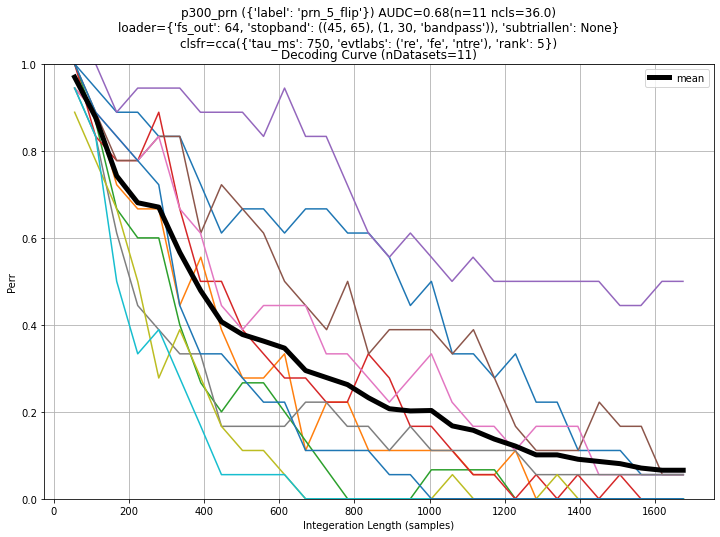

In [47]:
analyse_datasets('p300_prn',dataset_args=dict(label='prn_5_flip'),
                 loader_args=dict(fs_out=64,stopband=((45,65),(1,30,'bandpass')),subtriallen=None),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False, whiten_spectrum=.1),
                 model='cca',clsfr_args=dict(tau_ms=750,evtlabs=('re','fe','ntre'),rank=5),tuned_parameters=dict(rank=[1,2,3,5,10,20]))
# bp=1-12, evtlabs='re','anyre', tau=750, rank=3, reg=.02, wht_spect=.01, center=True -> .59 @13 (41,17,35,23)
# bp=1-12, evtlabs='re','anyre', tau=750, rank=3, reg=.02, wht_spect=.05, center=True -> .59 @16 (42,19,38,19)
# bp=1-12, evtlabs='re','anyre', tau=750, rank=3, reg=.02, wht_spect=.05, center=False -> .59 @16 (42,19,38,19)
# bp=1-12, evtlabs='re','anyre', tau=750, rank=3, reg=.02, wht_spect=False, center=False -> .46 @28 (53,28,51,23)
# bp=1-12, evtlabs='re','anyre', tau=750, rank=1, wht_spect=False, center=False -> .39 @28 (53,28,51,23)
# bp=1-30, evtlabs='re','fe','ntre', tau=750, rank=1, wht_spect=False, center=False -> .54 @21 (45,21,43,24)
# bp=1-30, evtlabs='re','fe','ntre', tau=750, rank=1, wht_spect=.1, center=False -> .55 @23 (45,21,43,24)
# bp=1-30, evtlabs='re','fe','ntre', tau=750, rank=3, wht_spect=False, center=False -> .55 @20 (45,21,43,24)
# bp=1-30, evtlabs='re','fe','ntre', tau=750, rank=3, wht_spect=.1, center=False -> .63 @09 (35,19,29,40)
# bp=1-30, evtlabs='re','fe','ntre', tau=750, rank=5, wht_spect=.1, center=False -> .65 @11 (34,17,29,9)
# bp=1-30, evtlabs='re','fe','ntre', tau=750, rank=5, wht_spect=False, center=False -> .52 @23 (34,17,29,9)
# bp=1-30, evtlabs='re','fe','ntre', tau=750, rank=[1,2,3,5,10], wht_spect=False, center=False -> .67 @07 (31,26,27,22)



In [ ]:
analyse_datasets('p300_prn',dataset_args=dict(label='rc_10_flip'),
                 loader_args=dict(fs_out=32,stopband=((0,1),(12,-1)),subtriallen=None),
                 model='cca',clsfr_args=dict(tau_ms=750,evtlabs=('re','anyre'),rank=3,reg=.02))
# bp=1-12, ofs=32, tau=750, evtlabs=('re','anyre'), rank=3 = 81 @06 (19,114,17,140)

In [ ]:
analyse_datasets('p300_prn',dataset_args=dict(label='prn_10_flip'),
                 loader_args=dict(fs_out=32,stopband=((0,1),(12,-1)),subtriallen=None),
                 model='cca',clsfr_args=dict(tau_ms=750,evtlabs=('re','anyre'),rank=3,reg=.02))

In [ ]:
analyse_datasets('p300_prn',dataset_args=dict(label='prn_15_flip'),
                 loader_args=dict(fs_out=32,stopband=((0,1),(12,-1)),subtriallen=None),
                 model='cca',clsfr_args=dict(tau_ms=750,evtlabs=('re','anyre'),rank=3,reg=.02))
# bp=1-12, ofs=32, tau=750, evtlabs=('re','anyre'), rank=3 -> 76 @04 (23,46,20,37)

0) D:/own_experiments/visual/p300_prn_2\alex\20100722\jf_prep\alex_prn_5_flip.mat
stimRng=(-253.0, 6701.0)
Trimming range: -0.98828125-26.17578125ms
Spectral whiten:0.01
X(['trial', 'time', 'channel'])=(18, 838, 64), Y=(18, 838, 37) @32.0hz
Cscale=0.036433515919412525
Sigma0 = 0.2172472012054524
0) scale=0.5 Ed=4590.674816539073
1) scale=1 Ed=4104.331465908849
2) scale=1.5 Ed=3700.927084561521
3) scale=2 Ed=3378.5930560737324
4) scale=2.5 Ed=3132.1378912725004
5) scale=3 Ed=2954.6445097442247
6) scale=3.5 Ed=2834.362219557399
7) scale=4 Ed=2756.914727802934
8) scale=5 Ed=2686.1349499221733
9) scale=7 Ed=2701.111272340665
10) scale=10 Ed=2819.2116997276785
softmaxscale=5
LinearSklearn(badEpThresh=None,
              clsfr=LogisticRegression(C=2.7447254945471227, class_weight=None,
                                       dual=False, fit_intercept=True,
                                       intercept_scaling=1, l1_ratio=None,
                                       max_iter=100, multi_clas

Int Lens:..............................

            IntLen   111   223   307   419   530   614   726   838 
              Perr  0.83  0.89  0.94  0.72  0.72  0.67  0.61  0.67   AUDC 77.2
         Perr(est)  0.91  0.89  0.84  0.80  0.79  0.77  0.72  0.74   PSAE 10.1
           StopErr  0.94  0.89  0.94  0.72  0.67  0.67  0.67  0.67   AUSC 77.0
     StopThresh(P)  0.90  0.87  0.85  0.76  0.75  0.73  0.73  0.74   SSAE  7.8

5) D:/own_experiments/visual/p300_prn_2\linsey\20100715\jf_prep\linsey_prn_5_flip.mat
stimRng=(-253.0, 6701.0)
Trimming range: -0.98828125-26.17578125ms
Spectral whiten:0.01
X(['trial', 'time', 'channel'])=(18, 838, 64), Y=(18, 838, 37) @32.0hz
Cscale=0.035979281547021603
Sigma0 = 0.19660451093982156
0) scale=0.5 Ed=4616.445720488465
1) scale=1 Ed=4145.7411795519965
2) scale=1.5 Ed=3747.098042888314
3) scale=2 Ed=3423.011809820183
4) scale=2.5 Ed=3173.3034012431426
5) scale=3 Ed=2992.579518450087
6) scale=3.5 Ed=2868.730708249807
7) scale=4 Ed=2790.1935850202326
8) sc

Int Lens:..............................

            IntLen   111   223   307   419   530   614   726   838 
              Perr  0.67  0.50  0.28  0.11  0.06  0.17  0.06  0.06   AUDC 30.4
         Perr(est)  0.78  0.63  0.39  0.21  0.18  0.14  0.09  0.09   PSAE 40.0
           StopErr  0.72  0.33  0.22  0.11  0.11  0.06  0.06  0.06   AUSC 25.7
     StopThresh(P)  0.74  0.57  0.41  0.19  0.11  0.10  0.10  0.10   SSAE 43.5

10) D:/own_experiments/visual/p300_prn_2\rutger\20100714\jf_prep\rutger_prn_5_flip.mat
stimRng=(-253.0, 6700.0)
Trimming range: -0.98828125-26.171875ms
Spectral whiten:0.01
X(['trial', 'time', 'channel'])=(18, 838, 64), Y=(18, 838, 37) @32.0hz
Cscale=0.03341668024154864
Sigma0 = 0.16339596742562446
0) scale=0.5 Ed=4699.183272407226
1) scale=1 Ed=4252.088498483684
2) scale=1.5 Ed=3877.1047909993845
3) scale=2 Ed=3568.093332031953
4) scale=2.5 Ed=3326.7425960209657
5) scale=3 Ed=3149.5245301366804
6) scale=3.5 Ed=3024.797676067952
7) scale=4 Ed=2943.098802881953
8) scal

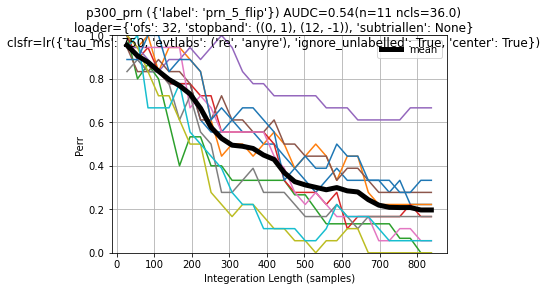

In [15]:
analyse_datasets('p300_prn',dataset_args=dict(label='prn_5_flip'),
                 loader_args=dict(fs_out=32,stopband=((0,1),(12,-1)),subtriallen=None),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False, whiten_spectrum=.01),
                 model='lr',clsfr_args=dict(tau_ms=750,evtlabs=('re','anyre'),ignore_unlabelled=True,center=True))
# bp=1-12, tau=750, rank=3, reg=.02 -> .47 (53,83,52,92)  
# bp=1-12, tau=750, rank=3, reg=.02, wht_spect=.1 -> .54 (46,16,42,15)  # p-val are too pessimistic


In [ ]:
analyse_datasets('p300_prn',dataset_args=dict(label='rc_5_flash'),
                 loader_args=dict(ofs=32,stopband=((0,1),(12,-1)),subtriallen=None),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False),
                 model='lr',clsfr_args=dict(tau_ms=750,evtlabs=('re','anyre'),ignore_unlabelled=True,center=True))

In [ ]:
analyse_datasets('p300_prn',dataset_args=dict(label='rc_5_flip'),
                 loader_args=dict(ofs=32,stopband=((0,1),(12,-1)),subtriallen=None),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False),
                 model='lr',clsfr_args=dict(tau_ms=750,evtlabs=('re','anyre'),ignore_unlabelled=True,center=True))

In [ ]:
analyse_datasets('p300_prn',dataset_args=dict(label='rc_10_flip'),
                 loader_args=dict(ofs=32,stopband=((0,1),(12,-1)),subtriallen=None),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False),
                 model='lr',clsfr_args=dict(tau_ms=750,evtlabs=('re','anyre'),ignore_unlabelled=True,center=True))

In [ ]:
analyse_datasets('p300_prn',dataset_args=dict(label='prn_10_flip'),
                 loader_args=dict(ofs=32,stopband=((0,1),(12,-1)),subtriallen=None),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False),
                 model='lr',clsfr_args=dict(tau_ms=750,evtlabs=('re','anyre'),ignore_unlabelled=True,center=True))

In [ ]:
analyse_datasets('p300_prn',dataset_args=dict(label='prn_15_flip'),
                 loader_args=dict(ofs=32,stopband=((0,1),(12,-1)),subtriallen=None),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False),
                 model='lr',clsfr_args=dict(tau_ms=750,evtlabs=('re','anyre'),ignore_unlabelled=True,center=True))

In [ ]:
    analyse_datasets("openBMI_ERP",clsfr_args=dict(tau_ms=700,evtlabs=('re','ntre'),rank=5),
                     loader_args=dict(ofs=30,stopband=((0,1),(12,-1))))
# bp=1-12, evtlabs=('re','ntre'), tau=700, rank=5 -> 

In [19]:
debug_test_single_dataset('p300_prn',dataset_args=dict(label='jason.*prn_5_flip'),
                 loader_args=dict(fs_out=64,stopband=((45,65),(0,1),(30,-1)),subtriallen=None),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False, whiten_spectrum=.05),
                 model='cca',clsfr_args=dict(tau_ms=750,evtlabs=('re','anyre'),rank=3,reg=.02,center=True))

TypeError: load_p300_prn() got an unexpected keyword argument 'ofs'

stimRng=(-253.0, 6701.0)
Trimming range: -0.98828125-26.17578125ms


No handles with labels found to put in legend.


X(['trial', 'time', 'channel'])(18, 1676, 64)
Y=(18, 1676, 37)
fs=64.0
ch_pos=(64, 2)
Plot X+Y


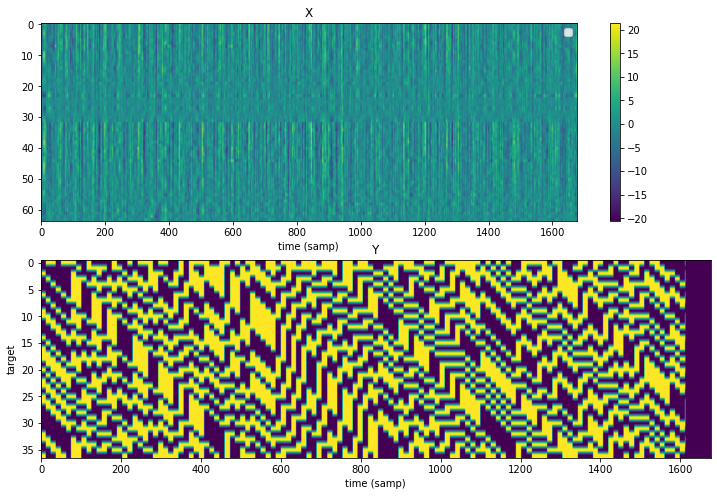

Plot summary stats


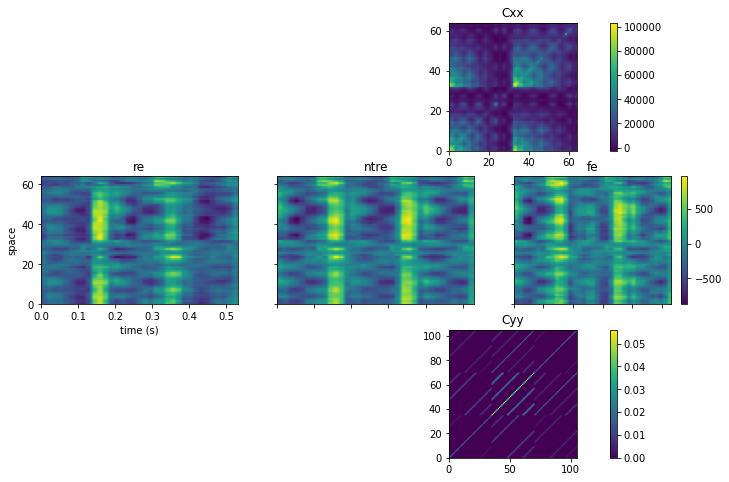

Plot global spectral properties
FX=(18, 17, 64)
erp=(1, 17, 64)


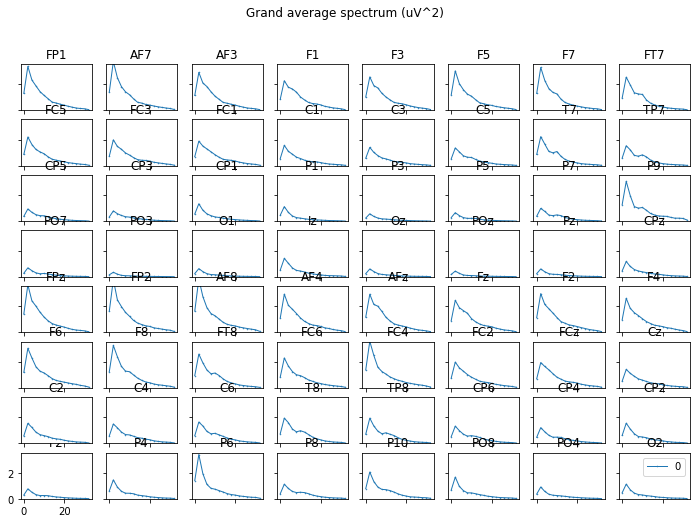

Plot ERP
erp=(3, 35, 64)


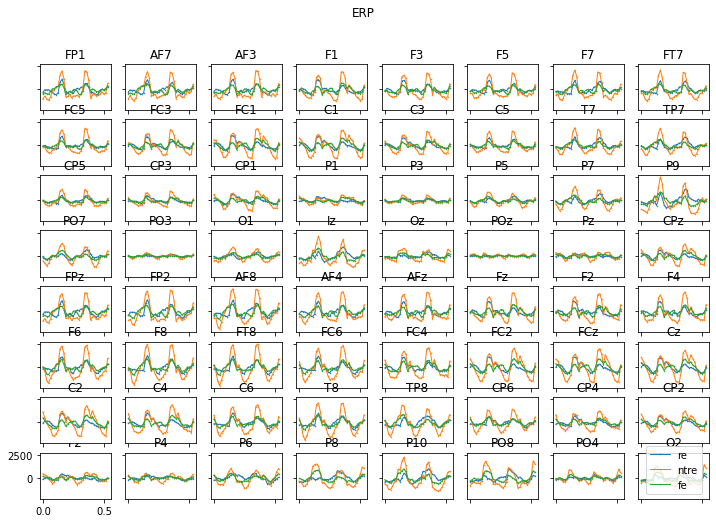

X(['trial', 'time', 'channel'])=(18, 1676, 64), Y=(18, 1676, 37) @64.0hz
Cscale=4.642875616169629
Sigma0 = 0.010772768709801612
softmaxscale=15
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'ntre', 'fe'),
         offset=0, rank=1, rcond=(0.0001, 1e-08), reg=(1e-08, None),
         symetric=False, tau=35)
score=0.6472421108459294
Int Lens:..............................

            IntLen   223   446   614   838  1061  1229  1452  1676 
              Perr  0.94  0.56  0.44  0.17  0.17  0.00  0.00  0.00   AUDC 34.6
         Perr(est)  0.73  0.56  0.38  0.25  0.21  0.17  0.09  0.09   PSAE 49.4
           StopErr  0.83  0.56  0.39  0.11  0.06  0.00  0.00  0.00   AUSC 29.1
     StopThresh(P)  0.61  0.49  0.38  0.16  0.11  0.09  0.09  0.09   SSAE 47.0

Plot Model
erp=(3, 35, 64)


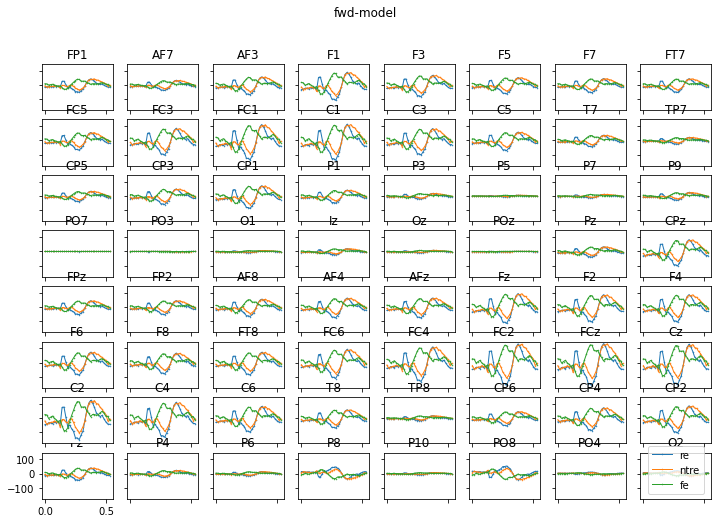

Plot Factored Model
Plot Factored Model
trying to get pos from cap file!
A=(1, 64) R=(1, 3, 35)


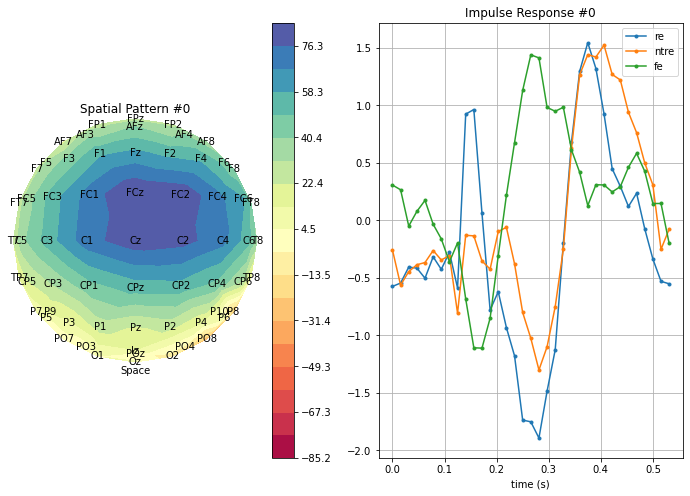

plot Fe


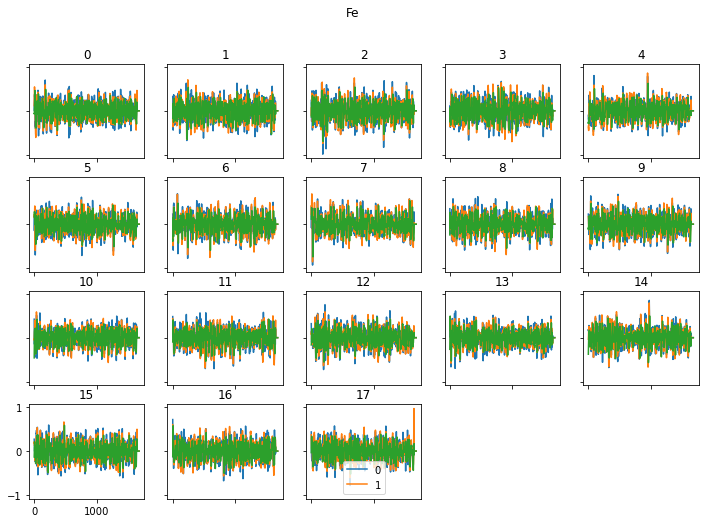

plot Fy


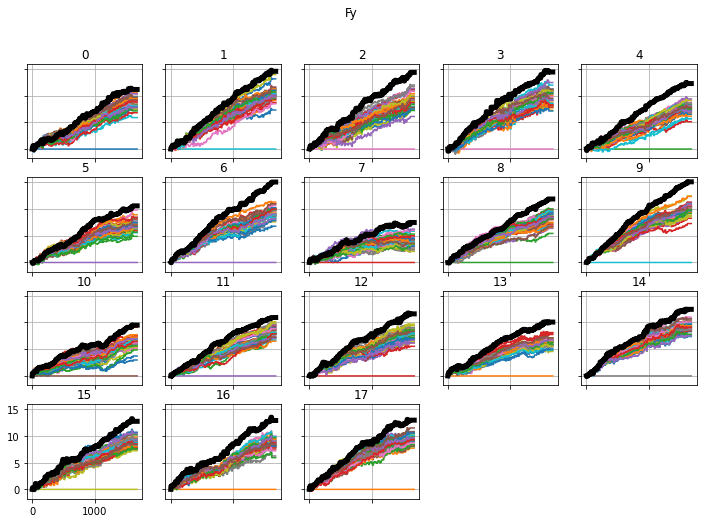

normalized Fy


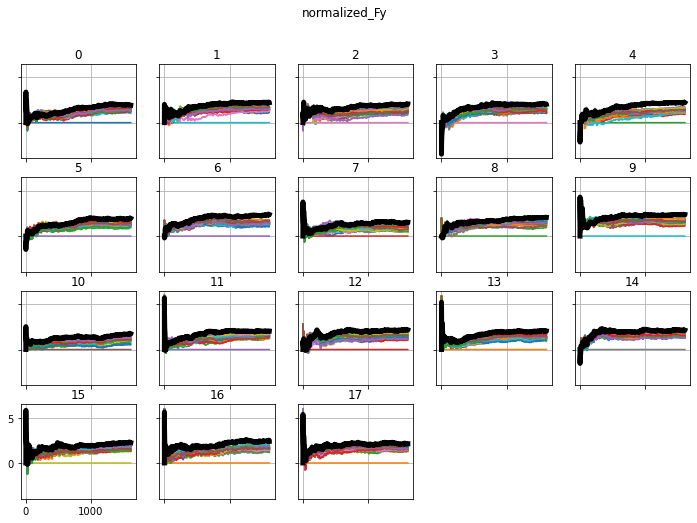

sFy=(1676, 37)


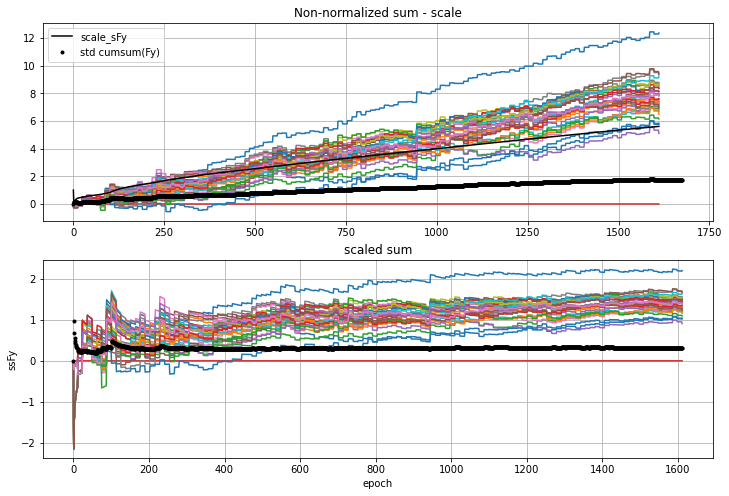

(MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'ntre', 'fe'),
          offset=0, rank=1, rcond=(0.0001, 1e-08), reg=(1e-08, None),
          symetric=False, tau=35),
 (array([  55,  111,  167,  223,  279,  335,  391,  446,  502,  558,  614,
          670,  726,  782,  838,  893,  949, 1005, 1061, 1117, 1173, 1229,
         1284, 1340, 1396, 1452, 1508, 1564, 1620, 1676]),
  array([1.        , 0.94444444, 0.94444444, 0.94444444, 0.88888889,
         0.88888889, 0.77777778, 0.55555556, 0.55555556, 0.38888889,
         0.44444444, 0.38888889, 0.33333333, 0.16666667, 0.16666667,
         0.16666667, 0.22222222, 0.16666667, 0.16666667, 0.16666667,
         0.11111111, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ]),
  array([0.7632244 , 0.7201327 , 0.7495499 , 0.72630501, 0.74216601,
         0.74358424, 0.70074273, 0.55587877, 0.49817837, 0.43745092,
         0.38411209, 0.32986147, 0.30195496, 0.2806548

In [35]:
debug_test_single_dataset('p300_prn',dataset_args=dict(label='jason.*prn_5_flip'),
                 loader_args=dict(fs_out=64,stopband=((45,65),(1,30,'bandpass')),subtriallen=None),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False, whiten_spectrum=False),
                 model='cca',clsfr_args=dict(tau_ms=550,evtlabs=('re','ntre','fe'),rank=1),ranks=(1,2,3,5,10)) # reg=.02,center=True

0) C:/Users/Developer/Downloads/mark\mindaffectBCI_brainflow_200911_1229_90cal.txt
X=(55065, 4) @200.2002002002002Hz
preFilter: ((45, 65), (0, 3), (25, -1))Hz & downsample 200.2002002002002->100Hz
resample: 200.2002002002002->100.1001001001001hz rsrate=2.0
slicing 20 trials =[-50 - 760] samples @ 100.1001001001001Hz
X(['trial', 'time', 'channel'])=(20, 810, 4), Y=(20, 810, 26) @100.1001001001001hz
Cscale=4.779793530473146
Sigma0 = 0.0062671862640941494
softmaxscale=2.5
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=None, reg=0.02, symetric=False, tau=45)
score=0.4874074074074074
Int Lens:..............................

            IntLen   108   216   297   405   513   594   702   810 
              Perr  0.80  0.70  0.70  0.50  0.45  0.40  0.30  0.30   AUDC 56.2
         Perr(est)  0.79  0.59  0.57  0.52  0.50  0.51  0.50  0.52   PSAE 27.6
           StopErr  0.75  0.70  0.65  0.50  0.50  0.40  0.40  0.30   AUSC 56.2
     StopThre

8) C:/Users/Developer/Downloads/mark\mindaffectBCI_noisetag_bci_200904_1129.txt
X=(60786, 4) @200.2002002002002Hz
preFilter: ((45, 65), (0, 3), (25, -1))Hz & downsample 200.2002002002002->100Hz
resample: 200.2002002002002->100.1001001001001hz rsrate=2.0
slicing 29 trials =[-50 - 470] samples @ 100.1001001001001Hz
X(['trial', 'time', 'channel'])=(29, 520, 4), Y=(29, 520, 26) @100.1001001001001hz
Cscale=2.875145642893168
Sigma0 = 0.011781329521492733
softmaxscale=2
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=None, reg=0.02, symetric=False, tau=45)
score=0.455106100795756
Int Lens:..............................

            IntLen    69   138   190   260   329   381   450   520 
              Perr  0.93  0.72  0.79  0.62  0.59  0.45  0.38  0.38   AUDC 63.7
         Perr(est)  0.89  0.73  0.69  0.63  0.58  0.54  0.52  0.53   PSAE 12.9
           StopErr  0.93  0.76  0.69  0.62  0.48  0.48  0.38  0.38   AUSC 61.4
     StopThresh(P)  

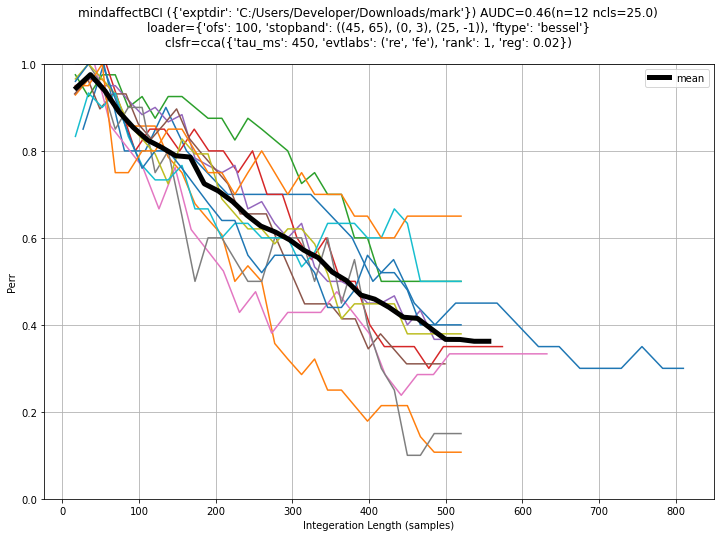

In [13]:
analyse_datasets('mindaffectBCI',dataset_args=dict(exptdir="~/Desktop/mark"),
                 loader_args=dict(ofs=100,stopband=((45,65),(0,3),(25,-1)),ftype='bessel'),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False, whiten_spectrum=False),
                 model='cca',clsfr_args=dict(tau_ms=450,evtlabs=('re','fe'),rank=1))
# 200hz, bessel, rank=1, reg=.02 -> 47 (59,11,58,11)
# 200hz, bessel, rank=1, reg=.05 -> 47 (60,11,58,11)
# 200hz, bessel, rank=1, reg=.0 -> 47 (60,10,59,11)
# 133hz, bessel, rank=1, reg=.02 -> 46 (61,9,60,9)
# 100hz, bessel, rank=1, reg=.02 -> 45 (62,10,59,10)

# 200hz, butter -> 47 (59,10,58,10)


0) C:/Users/Developer/Downloads/mark\mindaffectBCI_brainflow_200911_1229_90cal.txt
X=(55065, 4) @200.2002002002002Hz
preFilter: ((45, 65), (0, 3), (25, -1))Hz & downsample 200.2002002002002->200Hz
resample: 200.2002002002002->200.2002002002002hz rsrate=1.0
slicing 20 trials =[-100 - 1521] samples @ 200.2002002002002Hz
X(['trial', 'time', 'channel'])=(20, 1621, 4), Y=(20, 1621, 26) @200.2002002002002hz
Cscale=6.663802954529133
Sigma0 = 0.010234021540924423
softmaxscale=4
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=None, reg=0.02, symetric=False, tau=90)
score=0.4733806292412091
Int Lens:..............................

            IntLen   216   432   594   810  1026  1188  1404  1621 
              Perr  0.90  0.75  0.65  0.45  0.50  0.45  0.35  0.30   AUDC 57.0
         Perr(est)  0.78  0.58  0.49  0.47  0.45  0.44  0.45  0.47   PSAE 18.9
           StopErr  0.90  0.65  0.60  0.45  0.45  0.40  0.30  0.30   AUSC 53.0
     StopThr

8) C:/Users/Developer/Downloads/mark\mindaffectBCI_noisetag_bci_200904_1129.txt
X=(60786, 4) @200.2002002002002Hz
preFilter: ((45, 65), (0, 3), (25, -1))Hz & downsample 200.2002002002002->200Hz
resample: 200.2002002002002->200.2002002002002hz rsrate=1.0
slicing 29 trials =[-100 - 940] samples @ 200.2002002002002Hz
X(['trial', 'time', 'channel'])=(29, 1040, 4), Y=(29, 1040, 26) @200.2002002002002hz
Cscale=3.8994855724541893
Sigma0 = 0.01977137879813102
softmaxscale=3
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=None, reg=0.02, symetric=False, tau=90)
score=0.48149867374005306
Int Lens:..............................

            IntLen   138   277   381   520   658   762   901  1040 
              Perr  0.93  0.83  0.62  0.59  0.48  0.45  0.38  0.41   AUDC 60.3
         Perr(est)  0.89  0.72  0.70  0.60  0.53  0.48  0.45  0.46   PSAE 11.9
           StopErr  0.97  0.79  0.72  0.62  0.55  0.41  0.41  0.41   AUSC 63.9
     StopThresh

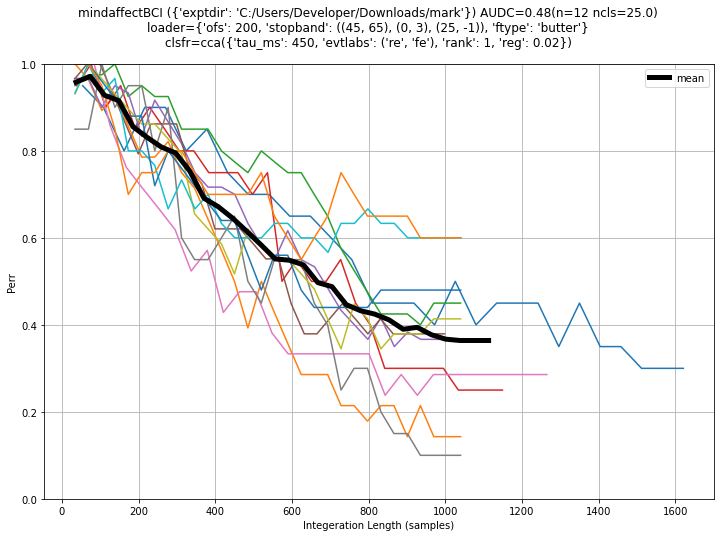

In [8]:
analyse_datasets('mindaffectBCI',dataset_args=dict(exptdir="~/Desktop/mark"),
                 loader_args=dict(fs_out=200,stopband=((45,65),(0,3),(25,-1)),ftype='butter'),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False, whiten_spectrum=False, nY=9),
                 model='cca',clsfr_args=dict(tau_ms=450,evtlabs=('re','fe'),rank=1))

0) C:\Users\Developer/Desktop/mark\mindaffectBCI_brainflow_200911_1229_90cal.txt
Loading C:\Users\Developer/Desktop/mark\mindaffectBCI_brainflow_200911_1229_90cal.txt
X=(55065, 4) @200.0Hz
preFilter: 6th butter ((45, 65), (5.5, 25, 'bandpass'))Hz & downsample 200.0->100Hz
resample: 200.0->100.0hz rsrate=2.0
Got 20 trials, keeping 20
20 trl_dur (samp): [ 729  728  728  728  729  728  728  728  729 6307 1208 1208 1210 1208
 1208 1208 1208 1208 1209]
20 trl_dur (ms) : [ 7282.  7282.  7283.  7282.  7282.  7282.  7282.  7282.  7282. 63072.
 12082. 12081. 12098. 12082. 12081. 12081. 12081. 12082. 12081.]
slicing 20 trials =[-50 - 1049] samples @ 100.0Hz
X(['trial', 'time', 'channel'])=(20, 1099, 4), Y=(20, 1099, 26) @100.0hz
Cscale=5.306136131286621
Rank score: 1=0.257, 2=0.283, 3=0.318, 5=0.294 -> best=3
Sigma0 = 0.023516789078712463
softmaxscale=2.5
model wght= [0.2189893  0.17473266 0.2005173  0.18160328 0.22415757]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offs

Int Lens:..............................

            IntLen   146   293   402   549   696   805   952  1099 
              Perr  0.90  0.76  0.70  0.70  0.66  0.64  0.62  0.62   AUDC 72.5
         Perr(est)  0.82  0.65  0.57  0.56  0.58  0.61  0.62  0.63   PSAE 11.2
           StopErr  0.97  0.92  0.83  0.80  0.75  0.70  0.72  0.68   AUSC 81.2
     StopThresh(P)  0.88  0.82  0.67  0.60  0.57  0.59  0.64  0.68   SSAE 14.4

5) C:\Users\Developer/Desktop/mark\mindaffectBCI_brainflow_android_200911_1405.txt
Loading C:\Users\Developer/Desktop/mark\mindaffectBCI_brainflow_android_200911_1405.txt
X=(103543, 4) @200.0Hz
preFilter: 6th butter ((45, 65), (5.5, 25, 'bandpass'))Hz & downsample 200.0->100Hz
resample: 200.0->100.0hz rsrate=2.0
Got 30 trials, keeping 29
29 trl_dur (samp): [  709   709   709   709   709   709   709   709   709 10805   873   876
   591   876   876   889   673   875   880   931   769   875   876   876
   632   876   699   554]
29 trl_dur (ms) : [  7090.   7090.   7090. 

Int Lens:..............................

            IntLen    68   137   189   258   327   379   448   517 
              Perr  0.90  0.80  0.40  0.10  0.10  0.10  0.10  0.10   AUDC 37.3
         Perr(est)  0.66  0.59  0.52  0.17  0.11  0.12  0.14  0.14   PSAE 31.4
           StopErr  0.90  0.50  0.20  0.10  0.10  0.10  0.10  0.10   AUSC 31.3
     StopThresh(P)  0.66  0.34  0.20  0.11  0.13  0.13  0.13  0.13   SSAE 26.5

10) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_3x3_201013_1454.txt
Loading C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_3x3_201013_1454.txt
X=(62784, 4) @200.0Hz
preFilter: 6th butter ((45, 65), (5.5, 25, 'bandpass'))Hz & downsample 200.0->100Hz
resample: 200.0->100.0hz rsrate=2.0
Got 10 trials, keeping 10
10 trl_dur (samp): [719 729 724 727 728 729 728 729 728]
10 trl_dur (ms) : [7281. 7283. 7282. 7282. 7282. 7282. 7283. 7281. 7283.]
slicing 10 trials =[-50 - 470] samples @ 100.0Hz
X(['trial', 'time', 'channel'])=(10, 520, 4), Y=(10, 520, 10) @1

Rank score: 1=0.658, 2=0.606, 3=0.593, 5=0.570 -> best=1
Sigma0 = 0.016018861904740334
softmaxscale=5
model wght= [0.28373107 0.16203687 0.15483208 0.14158946 0.25781053]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=(0.0001, 1e-08), reg=(1e-08, None), symetric=False,
         tau=44)
score=0.6598140631137881
Discarded 10 trials without true-label info
Int Lens:..............................

            IntLen   145   290   400   545   690   800   945  1091 
              Perr  0.83  0.74  0.43  0.23  0.20  0.11  0.14  0.11   AUDC 38.3
         Perr(est)  0.60  0.35  0.28  0.28  0.24  0.20  0.18  0.19   PSAE 30.8
           StopErr  0.91  0.91  0.78  0.58  0.40  0.40  0.31  0.31   AUSC 59.0
     StopThresh(P)  0.72  0.72  0.49  0.34  0.30  0.30  0.34  0.34   SSAE 23.1

15) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_200904_1123.txt
Loading C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_200904_1123.txt
X

Rank score: 1=0.372, 2=0.393, 3=0.346, 5=0.329 -> best=2
Sigma0 = 0.012429029680788517
softmaxscale=4
model wght= [0.28010735 0.14804327 0.15953128 0.15816388 0.25415424]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=2, rcond=(0.0001, 1e-08), reg=(1e-08, None), symetric=False,
         tau=45)
score=0.38642201834862383
Discarded 10 trials without true-label info
Int Lens:..............................

            IntLen    72   145   199   272   345   399   472   545 
              Perr  1.00  0.83  0.67  0.70  0.60  0.57  0.60  0.63   AUDC 70.8
         Perr(est)  0.85  0.78  0.81  0.60  0.54  0.49  0.46  0.48   PSAE 12.3
           StopErr  0.97  0.97  1.00  0.80  0.68  0.70  0.68  0.72   AUSC 82.6
     StopThresh(P)  0.94  0.94  0.87  0.76  0.62  0.59  0.56  0.61   SSAE  9.4

20) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201029_1350_ganglion.txt
Loading C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201029_

X=(83908, 4) @200.0Hz
preFilter: 6th butter ((45, 65), (5.5, 25, 'bandpass'))Hz & downsample 200.0->100Hz
resample: 200.0->100.0hz rsrate=2.0
Got 40 trials, keeping 38
38 trl_dur (samp): [ 728  724  729  727  729  732  728  728  727 2505  730  729  728  728
  729  727  728  729  728 3474  907  527  591  529 1263  771  685 1150
 2732 1209 1292 1116 1045 1214  630 1208 1208]
38 trl_dur (ms) : [ 7283.  7283.  7282.  7285.  7284.  7317.  7282.  7283.  7282. 25100.
  7300.  7284.  7284.  7282.  7285.  7283.  7283.  7284.  7283. 34884.
  9066.  5267.  5917.  5283. 12650.  7715.  6851. 11499. 27384. 12082.
 12918. 11167. 10450. 12133.  6300. 12082. 12083.]
slicing 38 trials =[-50 - 1035] samples @ 100.0Hz
X(['trial', 'time', 'channel'])=(38, 1085, 4), Y=(38, 1085, 26) @100.0hz
Cscale=3.1672542095184326
Rank score: 1=0.406, 2=0.413, 3=0.422, 5=0.430 -> best=5
Sigma0 = 0.013639690354466438
softmaxscale=4
model wght= [0.26085934 0.14835157 0.18488677 0.16579817 0.24010418]
MultiCCA(CCA=True, bad

Int Lens:..............................

            IntLen   146   293   403   550   696   806   953  1100 
              Perr  0.85  0.65  0.45  0.25  0.10  0.10  0.05  0.15   AUDC 36.7
         Perr(est)  0.57  0.29  0.26  0.20  0.12  0.06  0.11  0.09   PSAE 34.0
           StopErr  0.80  0.80  0.80  0.80  0.40  0.40  0.40  0.40   AUSC 61.4
     StopThresh(P)  0.75  0.75  0.75  0.48  0.36  0.36  0.36  0.36   SSAE 13.8

29) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201102_1326_ganglion.txt
Loading C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_201102_1326_ganglion.txt
X=(44406, 4) @200.0Hz
preFilter: 6th butter ((45, 65), (5.5, 25, 'bandpass'))Hz & downsample 200.0->100Hz
resample: 200.0->100.0hz rsrate=2.0
Got 20 trials, keeping 20
20 trl_dur (samp): [ 728  729  728  729  728  728  729  728  728 3542  673 1040  682  881
  723  670  882  638  639]
20 trl_dur (ms) : [ 7284.  7282.  7284.  7283.  7283.  7284.  7283.  7283.  7283. 35418.
  6733. 10399.  6817

Int Lens:..............................

            IntLen   146   293   403   550   696   806   953  1100 
              Perr  0.60  0.80  0.70  0.70  0.60  0.40  0.30  0.30   AUDC 59.3
         Perr(est)  0.79  0.64  0.57  0.44  0.45  0.32  0.30  0.31   PSAE 17.5
           StopErr  0.90  0.90  0.90  0.90  0.80  0.80  0.70  0.65   AUSC 82.8
     StopThresh(P)  0.93  0.93  0.93  0.93  0.78  0.69  0.67  0.65   SSAE  4.9

34) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_cyton_201015_1744.txt
Loading C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_cyton_201015_1744.txt
X=(289622, 8) @1000.0Hz
preFilter: 6th butter ((45, 65), (5.5, 25, 'bandpass'))Hz & downsample 1000.0->100Hz
resample: 1000.0->100.0hz rsrate=10.0
Got 30 trials, keeping 30
30 trl_dur (samp): [ 728  729  728  728  729  728  728  728  728 2894  492  693  473  463
  422  451  497  615  463 1851  793  726  550 1208 1208  795  540  829
 1087]
30 trl_dur (ms) : [ 7281.  7299.  7282.  7282.  7284.  7282

X=(991498, 8) @1000.0Hz
preFilter: 6th butter ((45, 65), (5.5, 25, 'bandpass'))Hz & downsample 1000.0->100Hz
resample: 1000.0->100.0hz rsrate=10.0
Got 60 trials, keeping 60
60 trl_dur (samp): [ 732  729  730  728  728  732  732  730  731 9128 1208 1188 1213 1211
 1212 1211 1212 1086 1176 2067 1212 1210 1215 1213 1207 1215 1212 1211
 1217 2919 1211 1100 1210 1209 1211 1208 1208 1210 1214 2623 1210 1209
 1211 1210 1213 1210 1209 1208 1208 2400 1214 1214 1222 1211 1228 1218
 1220 1214 1216]
60 trl_dur (ms) : [ 7314.  7299.  7299.  7281.  7283.  7315.  7315.  7299.  7315. 92901.
 12081. 12081. 12132. 12114. 12114. 12115. 12115. 12115. 12114. 20664.
 12131. 12098. 12148. 12131. 12081. 12148. 12114. 12115. 12165. 29194.
 12115. 12198. 12098. 12098. 12114. 12081. 12082. 12097. 12148. 26229.
 12098. 12098. 12114. 12098. 12131. 12099. 12097. 12082. 12081. 23996.
 12148. 12148. 12214. 12115. 12281. 12181. 12198. 12148. 12165.]
slicing 60 trials =[-50 - 1058] samples @ 100.0Hz
X(['trial', 'time',

Sigma0 = 0.018090123310685158
softmaxscale=7
model wght= [0.24742864 0.16966492 0.17599703 0.13991576 0.2669937 ]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=2, rcond=(0.0001, 1e-08), reg=(1e-08, None), symetric=False,
         tau=45)
score=0.6531835205992509
Discarded 10 trials without true-label info
Int Lens:..............................

            IntLen   118   237   326   445   563   652   771   890 
              Perr  0.95  0.57  0.33  0.24  0.19  0.19  0.19  0.19   AUDC 37.8
         Perr(est)  0.63  0.45  0.24  0.18  0.18  0.21  0.22  0.24   PSAE 16.7
           StopErr  0.94  0.94  0.94  0.61  0.52  0.48  0.48  0.48   AUSC 69.7
     StopThresh(P)  0.86  0.86  0.86  0.46  0.44  0.45  0.45  0.45   SSAE 10.8

44) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_cyton_201022_1436.txt
Loading C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_cyton_201022_1436.txt
X=(277531, 8) @1000.0Hz
preFilter: 6th butter 

Rank score: 1=0.403, 2=0.483, 3=0.450, 5=0.391 -> best=2
Sigma0 = 0.014995268546044827
softmaxscale=4
model wght= [0.24505208 0.16736896 0.16017032 0.16492382 0.26248488]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=2, rcond=(0.0001, 1e-08), reg=(1e-08, None), symetric=False,
         tau=45)
score=0.45078492935635794
Discarded 10 trials without true-label info
Int Lens:..............................

            IntLen    84   169   233   318   403   467   552   637 
              Perr  0.90  0.90  0.75  0.60  0.50  0.45  0.35  0.30   AUDC 61.7
         Perr(est)  0.83  0.78  0.68  0.53  0.41  0.35  0.39  0.41   PSAE 16.0
           StopErr  0.97  0.97  0.97  0.93  0.80  0.70  0.53  0.53   AUSC 81.6
     StopThresh(P)  0.90  0.90  0.90  0.78  0.66  0.63  0.59  0.59   SSAE  9.9

49) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_cyton_201026_1527.txt
Loading C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_cyton_2010

X(['trial', 'time', 'channel'])=(30, 929, 8), Y=(30, 929, 26) @100.0hz
Cscale=3.440548896789551
Rank score: 1=0.339, 2=0.275, 3=0.216, 5=0.187 -> best=1
Sigma0 = 0.010331312194466591
softmaxscale=4
model wght= [0.24691339 0.14034988 0.16810814 0.18283774 0.2617909 ]
MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=('re', 'fe'), offset=0,
         rank=1, rcond=(0.0001, 1e-08), reg=(1e-08, None), symetric=False,
         tau=45)
score=0.3644241119483315
Discarded 10 trials without true-label info
Int Lens:..............................

            IntLen   123   247   340   464   588   681   805   929 
              Perr  0.95  0.90  0.75  0.65  0.60  0.65  0.60  0.55   AUDC 71.7
         Perr(est)  0.76  0.71  0.59  0.51  0.49  0.52  0.52  0.53   PSAE 17.5
           StopErr  0.97  0.97  0.97  0.93  0.80  0.73  0.70  0.70   AUSC 85.6
     StopThresh(P)  0.87  0.87  0.87  0.73  0.64  0.60  0.62  0.68   SSAE 13.5

54) C:\Users\Developer/Desktop/mark\mindaffectBCI_noisetag_bci_gang

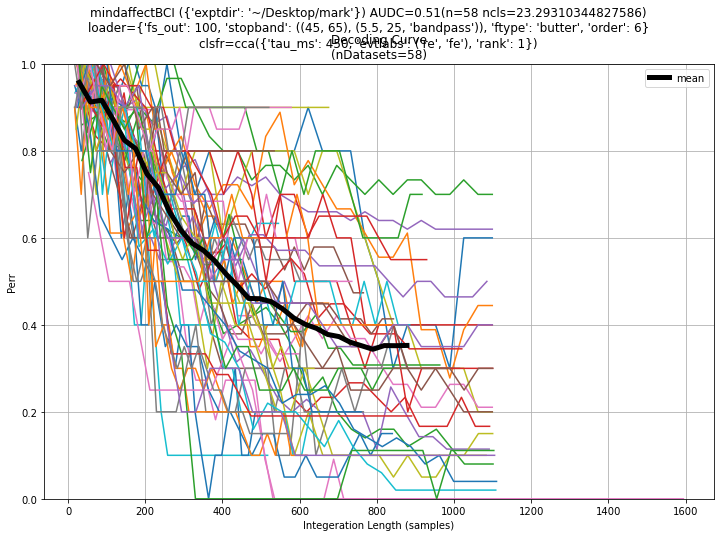

In [2]:
stopband=((45,65),(5.5,25,'bandpass'))
filterbank=None #((5,10,'bandpass'),(10,15,'bandpass'),(15,20,'bandpass'),(20,25,'bandpass'))
cv=[((slice(10),slice(10,None)))]

analyse_datasets('mindaffectBCI',dataset_args=dict(exptdir="~/Desktop/mark"),
                 loader_args=dict(fs_out=100,stopband=stopband,ftype='butter',order=6),
                 preprocess_args=dict(badChannelThresh=None, badTrialThresh=None, whiten=False, whiten_spectrum=False, filterbank=filterbank, decorrelate=False, standardize=False),
                 model='cca',cv=cv,clsfr_args=dict(tau_ms=450,evtlabs=('re','fe'),rank=1),ranks=(1,2,3,5),prediction_offsets=(-2,-1,0,1,2))

# b=devel n=58, 1st10cv 100hz 5-25 butter ranks=1,2,3,5 pred_off=0 -> 53 @35 (51,12,77,10) # p-val are broken, stopping is poor...
# b=devel n=58, 1st10cv 100hz 5-25 butter ranks=1,2,3,5 pred_off=-1,0,1 -> 54 @31 (50,33,78,18)   
# b=devel n=58, 1st10cv 100hz 5-25 butter ranks=1,2,3,5 pred_off=0,1,2 -> 54 @33 (50,11,78,18)   
